## Data Preprocessing

- Data Vectorization: 데이터를 실수화 하는 작업
- Data Cleaning: 결측치, 이상치, 모순 데이터 등을 제거하는 작업
- Data Integration: 여러 개의 데이터 파일을 하나로 합치는 과정
- Data Reduction: 데이터가 과도하게 큰 경우 이를 줄이거나, 데이터의 차원을 축소하는 작업
- Data Transformation: 데이터에 로그를 씌우거나, 평균값을 구하거나 하는 방법으로 데이터를 변환하는 작업
- Data Balancing: 특정 클래스의 데이터가 타 클래스의 데이터 수와 너무 차이가 날 때, 샘플링을 통해 이 비율을 맞추는 작업

- Data Balancing
타겟데이터의 값이 불균형할 경우를 말함.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

# 그래프에서 '-' 기호가 문제가 생길 수 있음
mpl.rcParams['axes.unicode_minus'] = False

font_path = './font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
total = pd.read_csv('./data/finedust_predict(2018~2020).csv', encoding='utf-8-sig', index_col=0)
total.head()

,PM10,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
날짜,,,,,,,,,,
2018-01-01,33.0,-1.3,0.0,1.4,290,2.1,1016.8,6.14,1.0,-1.7
2018-01-02,32.0,-1.8,0.0,1.8,290,2.2,1018.1,5.36,2.3,-2.3
2018-01-03,30.0,-4.7,0.0,2.2,290,1.8,1019.9,6.56,3.6,-3.4
2018-01-04,39.0,-4.7,0.0,1.4,290,1.8,1016.5,4.73,6.5,-3.3
2018-01-05,48.0,-3.0,0.0,1.7,290,2.4,1010.3,5.96,3.6,-2.6


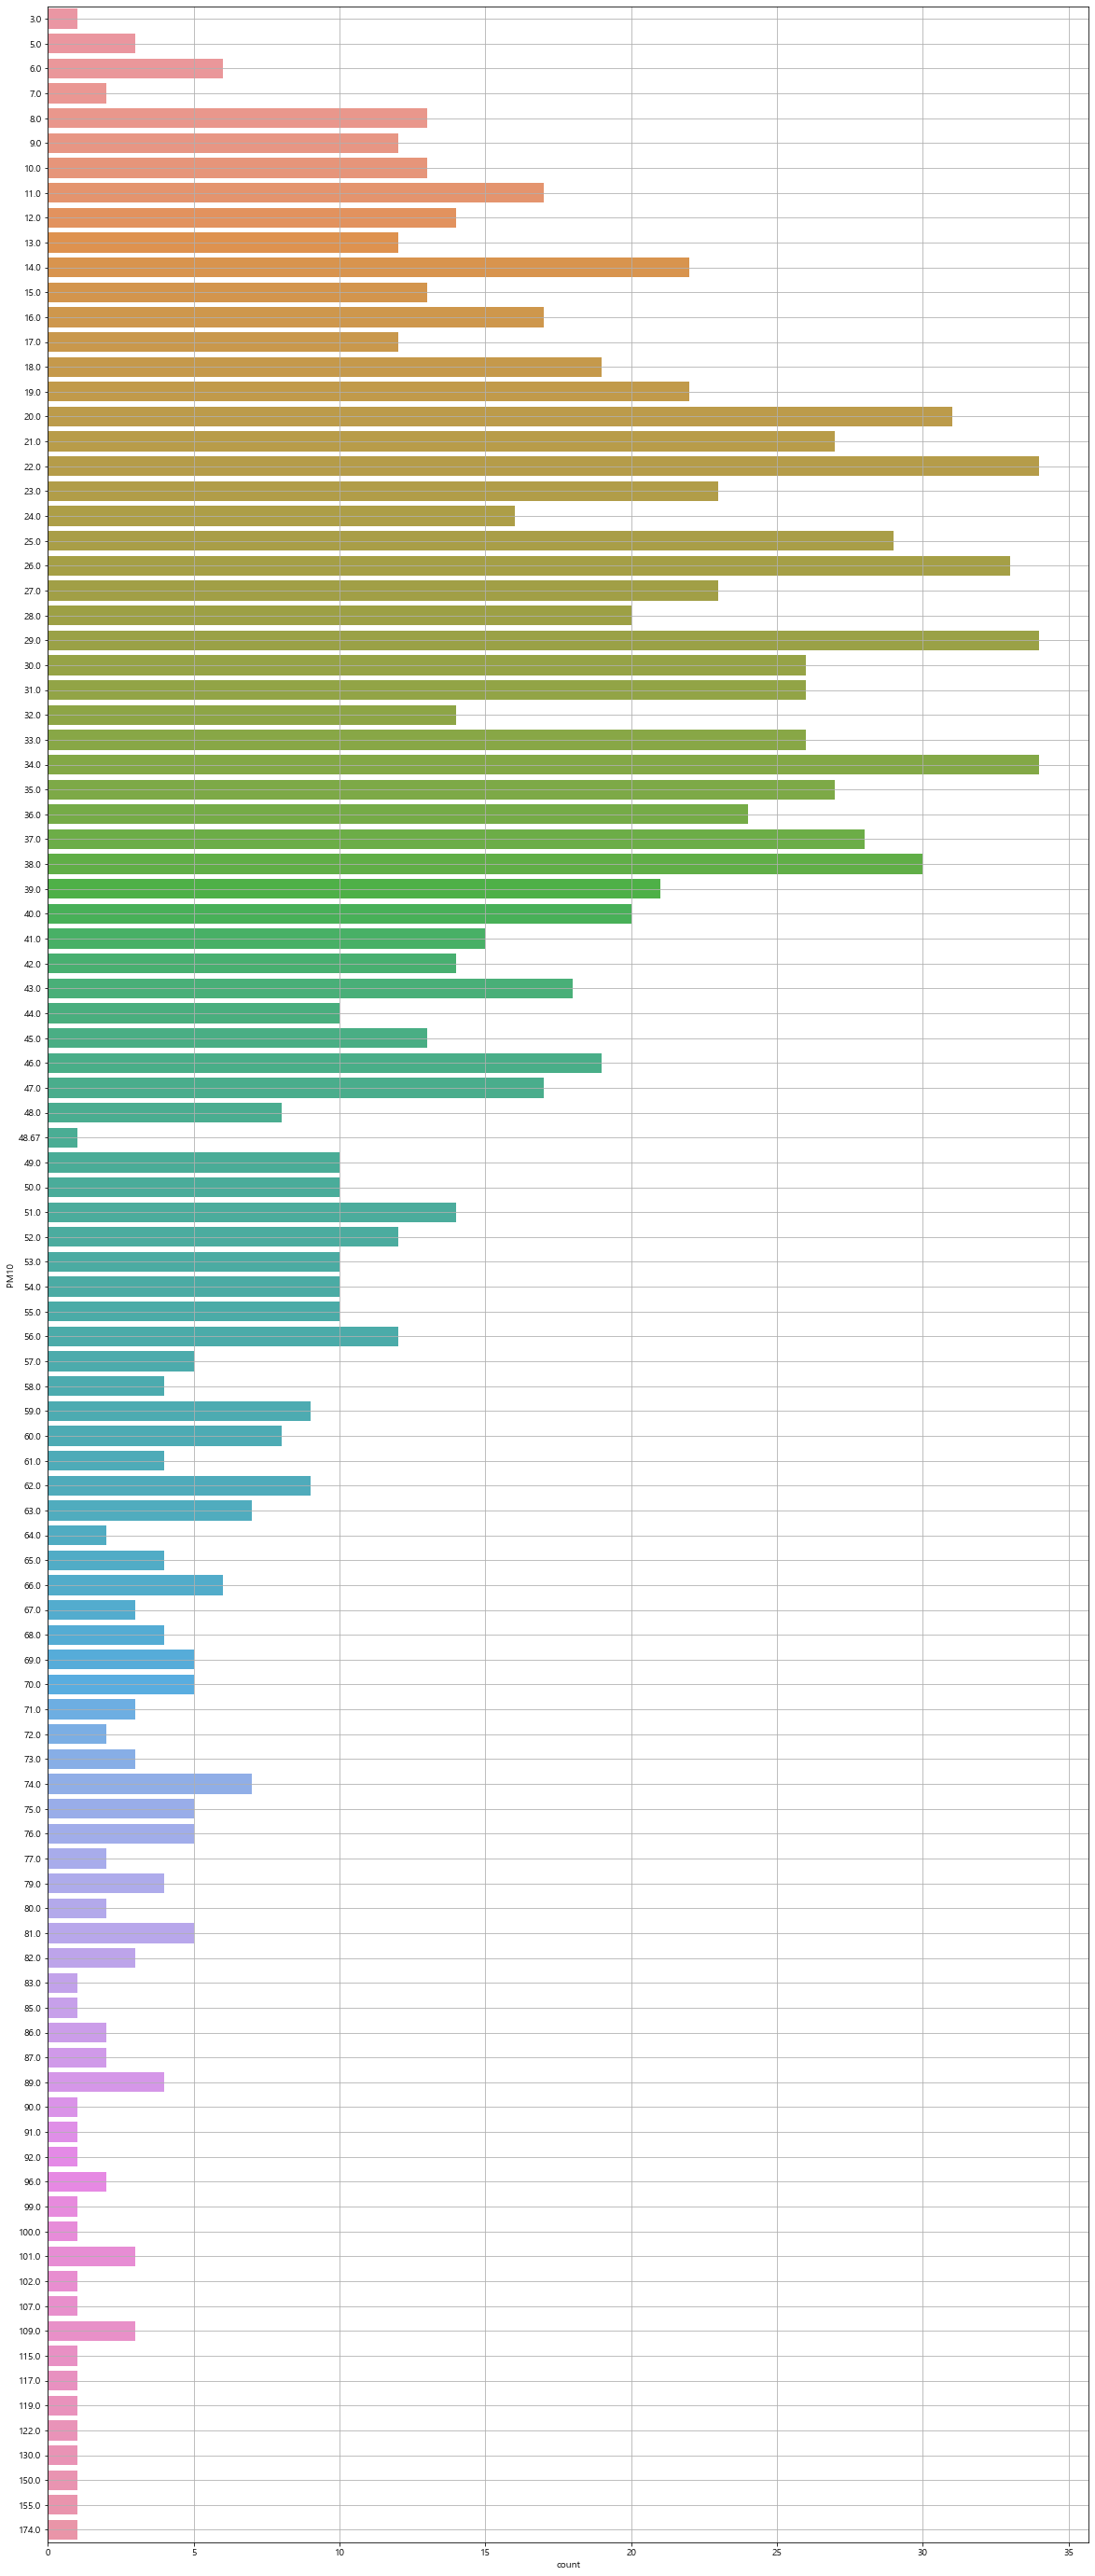

In [26]:
plt.figure(figsize=(20,50))
sns.countplot(y=total['PM10'])
plt.grid()
plt.show()

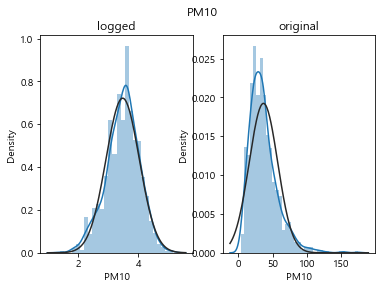

In [27]:
from scipy.stats import norm
fig, axes = plt.subplots(1,2)
sns.distplot(np.log1p(total['PM10']), fit=norm, ax=axes[0])
axes[0].set_title('logged')
sns.distplot(total['PM10'], fit=norm, ax=axes[1])
axes[1].set_title('original')
plt.suptitle('PM10')
plt.show()

In [28]:
total[['PM10', '일강수량(mm)']].corr()

,PM10,일강수량(mm)
PM10,1.000000,-0.216069
일강수량(mm),-0.216069,1.000000


In [38]:
total[['PM10', '최다풍향(16방위)']].corr()

,PM10,최다풍향(16방위)
PM10,1.000000,0.109605
최다풍향(16방위),0.109605,1.000000


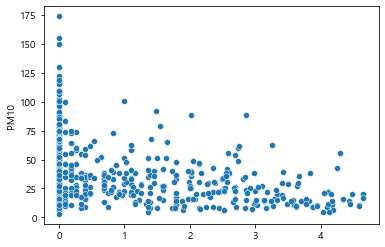

In [29]:
sns.scatterplot(np.log1p(total['일강수량(mm)'].to_numpy()), total['PM10'])
plt.show()

In [30]:
rain = total['일강수량(mm)'].to_numpy()

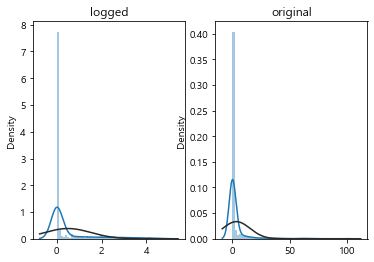

In [31]:
fig, axes = plt.subplots(1,2)
sns.distplot(np.log1p(rain), fit=norm, ax=axes[0])
axes[0].set_title('logged')
sns.distplot(rain, fit=norm, ax=axes[1])
axes[1].set_title('original')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.4)
remains, rain_ = smote.fit_resample(total['일강수량(mm)'], total.drop('일강수량(mm)', axis=1, inplace=False))

ValueError: Unknown label type: 'continuous-multioutput'

Data OverSampling, UnderSampling은
1. 타겟데이터 불균형 시에 사용하고
2. 분류문제에서 사용한다

In [34]:
total

,PM10,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
날짜,,,,,,,,,,
2018-01-01,33.0,-1.3,0.0,1.4,290,2.1,1016.8,6.14,1.0,-1.7
2018-01-02,32.0,-1.8,0.0,1.8,290,2.2,1018.1,5.36,2.3,-2.3
2018-01-03,30.0,-4.7,0.0,2.2,290,1.8,1019.9,6.56,3.6,-3.4
2018-01-04,39.0,-4.7,0.0,1.4,290,1.8,1016.5,4.73,6.5,-3.3
2018-01-05,48.0,-3.0,0.0,1.7,290,2.4,1010.3,5.96,3.6,-2.6
...,...,...,...,...,...,...,...,...,...,...
2020-09-28,27.0,20.7,0.0,2.0,50,15.7,1006.5,19.29,1.1,22.0
2020-09-29,37.0,19.6,0.0,1.9,290,15.1,1001.6,14.84,6.8,20.7
2020-09-30,36.0,19.6,38.3,1.7,20,17.4,1000.6,14.00,7.1,21.1


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(total)
standard_total = pd.DataFrame(scaler.transform(total), index=total.index, columns=total.columns)
standard_total

,PM10,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
날짜,,,,,,,,,,
2018-01-01,-0.166161,-1.393946,-0.293034,-0.895761,0.766333,-1.119328,1.301284,-1.103356,-1.253165,-1.451179
2018-01-02,-0.214368,-1.441713,-0.293034,-0.315271,0.766333,-1.107267,1.462008,-1.213830,-0.835443,-1.503717
2018-01-03,-0.310784,-1.718763,-0.293034,0.265219,0.766333,-1.155508,1.684547,-1.043871,-0.417722,-1.600036
2018-01-04,0.123085,-1.718763,-0.293034,-0.895761,0.766333,-1.155508,1.264194,-1.303058,0.514119,-1.591279
2018-01-05,0.556953,-1.556354,-0.293034,-0.460393,0.766333,-1.083147,0.497669,-1.128850,-0.417722,-1.529985
...,...,...,...,...,...,...,...,...,...,...
2020-09-28,-0.455406,0.707808,-0.293034,-0.025026,-1.515748,0.520853,0.027863,0.759112,-1.221033,0.624061
2020-09-29,0.026669,0.602720,-0.293034,-0.170148,0.766333,0.448493,-0.577940,0.128847,0.610516,0.510229
2020-09-30,-0.021538,0.602720,2.921555,-0.460393,-1.801008,0.725876,-0.701573,0.009876,0.706914,0.545255


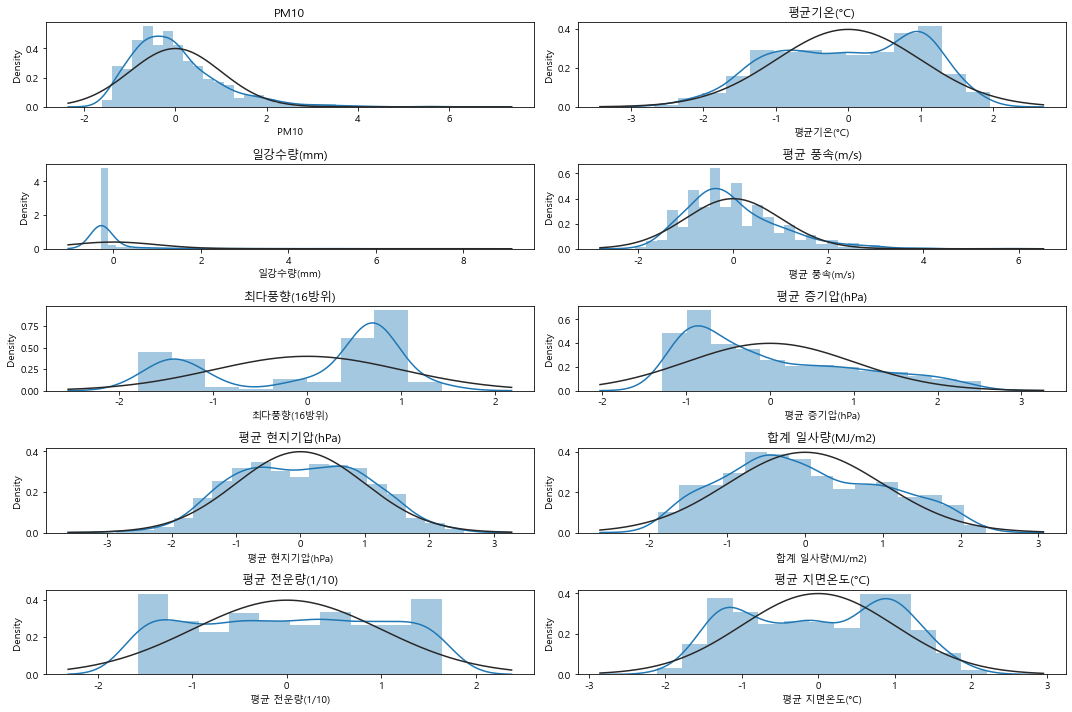

In [37]:
from scipy.stats import norm
fig = plt.figure(figsize=(15,10))

for i, c in enumerate(standard_total.columns):
    ax = fig.add_subplot(5,2, i+1)
    sns.distplot(standard_total[c], fit=norm)
    ax.set_title(c)

plt.tight_layout()
plt.show()

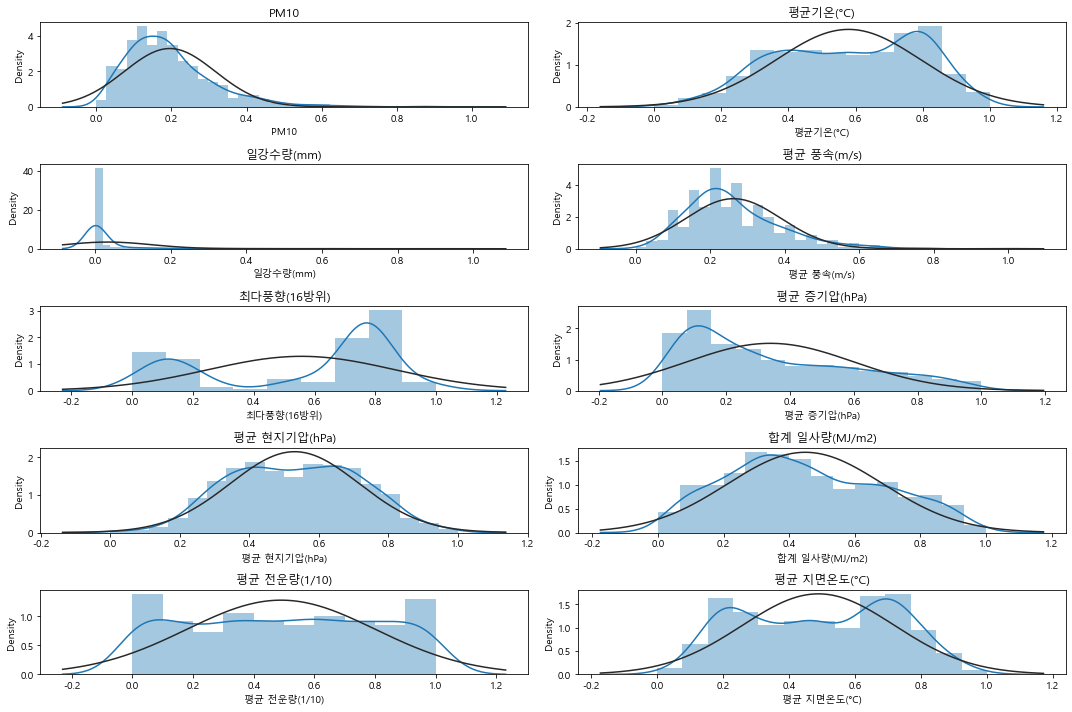

In [42]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax.fit(total)
scaled_total = pd.DataFrame(minmax.transform(total), index=total.index, columns=total.columns)
fig = plt.figure(figsize=(15,10))

for i, c in enumerate(standard_total.columns):
    ax = fig.add_subplot(5,2, i+1)
    sns.distplot(scaled_total[c], fit=norm)
    ax.set_title(c)

plt.tight_layout()
plt.show()

#### 전략
1. 그냥 예측
2. 일강수량 제외하고 예측
3. 최다풍향 제외하고 예측
4. 둘 다 제외하고 예측
5. PCA
6. 다른 요소로 예측